![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index represeting the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index represeting the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index represeting the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index represeting the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index represeting the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index represeting the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index represeting the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index represeting the popularity of the keyword 'home gym' during the 5 year period. |

In [34]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

When was the global search for 'workout' at its peak? Save the year of peak interest as a string named `year_str` in the format "yyyy".

In [35]:
df = pd.read_csv('data/workout.csv')
df['year'] = df['month'].str.split('-').str[0]
year_str = df.groupby('year')['workout_worldwide'].mean().idxmax()
year_str

'2020'

### Question 2

Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called `peak_covid` and `current` respectively.

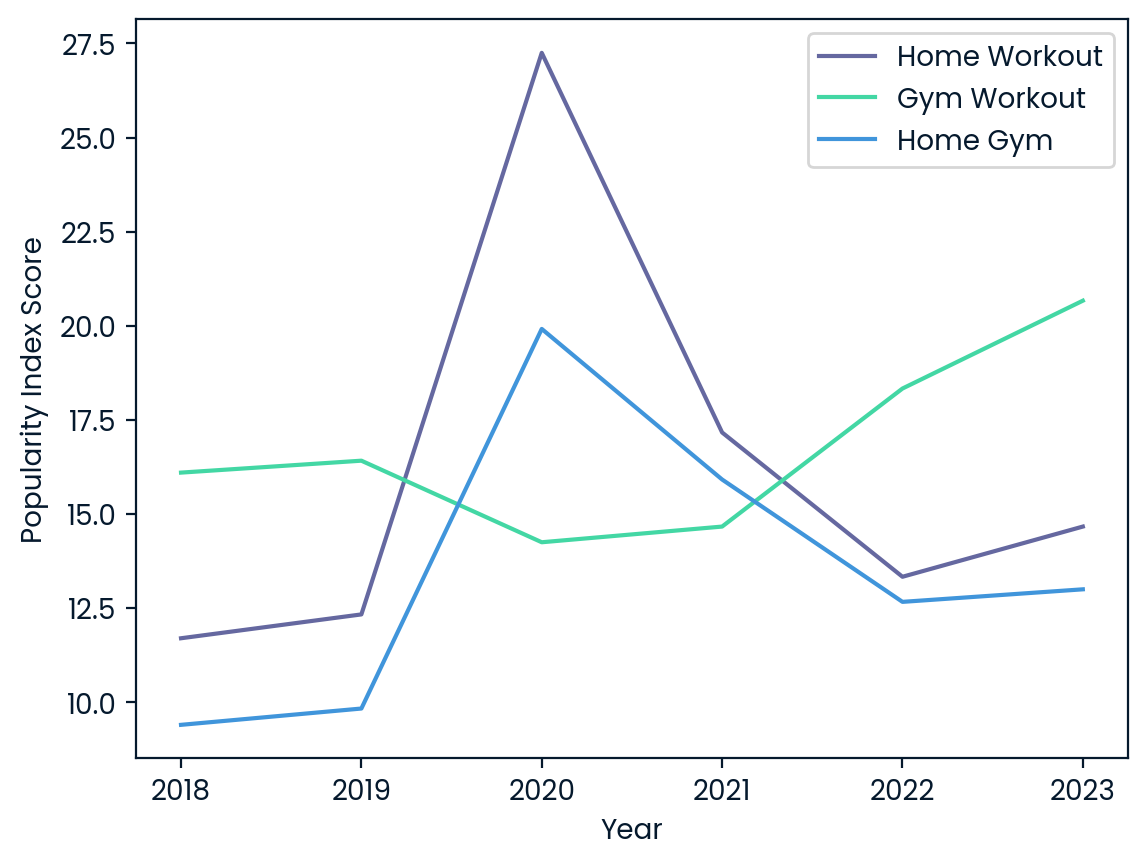

In [36]:
df = pd.read_csv('data/three_keywords.csv')
df['year'] = df['month'].str.split('-').str[0]
fig, ax = plt.subplots()
plt.plot(df['year'].unique(),
         df.groupby('year')['home_workout_worldwide'].mean(),
         label='Home Workout')
plt.plot(df['year'].unique(), 
         df.groupby('year')['gym_workout_worldwide'].mean(),
         label='Gym Workout')
plt.plot(df['year'].unique(),
         df.groupby('year')['home_gym_worldwide'].mean(),
         label='Home Gym')
ax.set_xlabel('Year')
ax.set_ylabel('Popularity Index Score')
ax.legend()

In [37]:
peak_covid = 'home workout'
current = 'gym workout'

### Question 3

What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as `top_country`.

In [38]:
df = pd.read_csv('data/workout_geo.csv')
df.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [39]:
top_country = df[df['country'].isin(['United States', 'Australia', 'Japan'])]\
                              .max()['country']

top_country

'United States'

### Question 4

You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as `home_workout_geo`.

In [40]:
df = pd.read_csv('data/three_keywords_geo.csv')
df.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [41]:
home_workout_geo = df[df['Country'].isin(['Malaysia', 'Philippines'])]\
                                   [['Country', 'home_workout_2018_2023']]\
                                   .max()['Country']

home_workout_geo

'Philippines'